In [82]:
import numpy as np
from collections import namedtuple
import matplotlib.pyplot as plt
from numpy.random import randint
import cv2

In [19]:
Bbox = namedtuple('Bbox', ['x', 'y', 'w', 'h'])

In [20]:
bb1 = Bbox(0, 0, 2, 2)
bb2 = Bbox(1, 0, 2, 2)

In [52]:
def draw_bbox(*args):
    plt.figure(figsize=(15, 7))
    for box in args:
        x, y, w, h = box.x, box.y, box.w, box.h
        ax = [x, x,     x + w, x + w, x]
        ay = [y, y + h, y + h, y,     y]
        plt.plot(ax, ay, linewidth=5, alpha=0.7)
        plt.scatter(x, y, s=100)
    plt.grid(True)
    plt.show()

In [60]:
def generate_bbox(n, nmax=10):
    return [Bbox(x=randint(0, nmax), y=randint(0, nmax), w=randint(1, nmax), h=randint(1, nmax)) for i in range(n)]

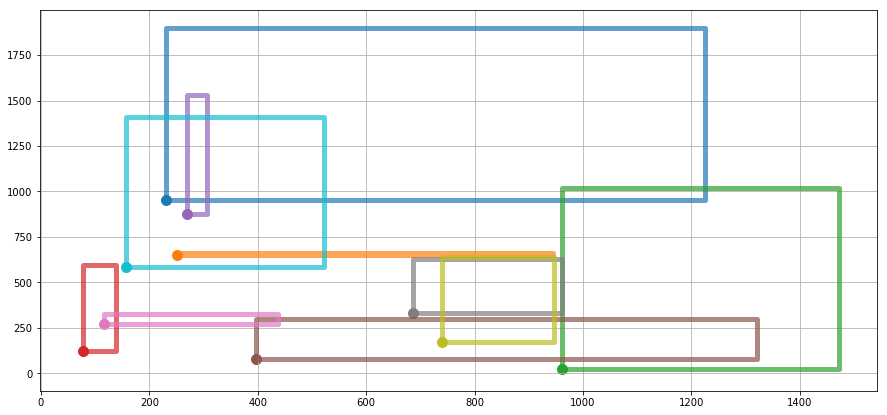

In [80]:
bbox_list = generate_bbox(10, 1000)
draw_bbox(*bbox_list)

In [ ]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
 
    # compute the area of intersection rectangle
    interArea = (xB - xA + 1) * (yB - yA + 1)
 
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
 
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
 
    # return the intersection over union value
    return iou

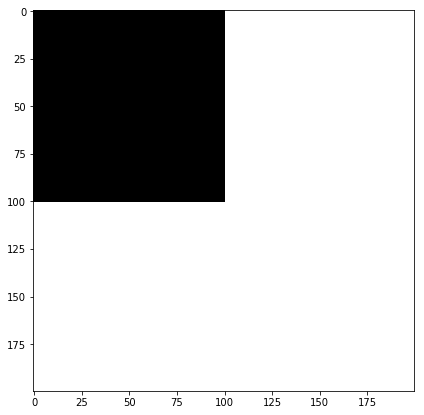

In [101]:
img = 255 * np.ones((200, 200, 3), np.uint8)
cv2.rectangle(img, pt1=(0, 0), pt2=(100, 100), color=(0, 0, 0), thickness=-1)
plt.figure(figsize=(15, 7))
plt.imshow(img)
plt.show()

In [ ]:
def get_iou(p, gt):
    